In [401]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [402]:
spx = pd.read_parquet("../data/spx_options.parquet")

In [403]:
spx

,underlying_symbol,quote_date,root,expiration,strike,option_type,open,high,low,close,...,bid_size_eod,bid_eod,ask_size_eod,ask_eod,underlying_bid_eod,underlying_ask_eod,vwap,open_interest,delivery_code,maturity
2291692,^SPX,2022-11-04,SPX,2022-11-18,200.0,C,0.0,0.0,0.0,0.0,...,15,3560.2,15,3576.40,3769.8,3771.25,0.0,745,None,0.038331
2291693,^SPX,2022-11-04,SPX,2022-11-18,200.0,P,0.0,0.0,0.0,0.0,...,0,0.0,323,0.05,3769.8,3771.25,0.0,156,None,0.038331
2291694,^SPX,2022-11-04,SPX,2022-11-18,400.0,C,0.0,0.0,0.0,0.0,...,15,3360.5,15,3376.60,3769.8,3771.25,0.0,318,None,0.038331
2291695,^SPX,2022-11-04,SPX,2022-11-18,400.0,P,0.0,0.0,0.0,0.0,...,0,0.0,5,0.05,3769.8,3771.25,0.0,560,None,0.038331
2291696,^SPX,2022-11-04,SPX,2022-11-18,600.0,C,0.0,0.0,0.0,0.0,...,15,3160.8,15,3176.90,3769.8,3771.25,0.0,102,None,0.038331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298292,^SPX,2022-11-04,SPX,2027-12-17,5000.0,C,0.0,0.0,0.0,0.0,...,5,464.7,5,521.50,3769.8,3771.25,0.0,1058,None,5.117148
2298293,^SPX,2022-11-04,SPX,2027-12-17,5000.0,P,0.0,0.0,0.0,0.0,...,5,927.5,5,971.20,3769.8,3771.25,0.0,1031,None,5.117148
2298294,^SPX,2022-11-04,SPX,2027-12-17,5200.0,C,0.0,0.0,0.0,0.0,...,5,404.1,5,457.50,3769.8,3771.25,0.0,124,None,5.117148
2298316,^SPX,2022-11-04,SPX,2027-12-17,8000.0,C,0.0,0.0,0.0,0.0,...,1,44.5,15,68.30,3769.8,3771.25,0.0,227,None,5.117148


In [404]:
spx = spx.query("open_interest > 1000")

In [405]:
spx["mid"] = (spx["bid_1545"] + spx["ask_1545"]) / 2

/var/folders/pb/0p55yvrn2r7cq2srd8qdk0wh0000gn/T/ipykernel_4202/2327003714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx["mid"] = (spx["bid_1545"] + spx["ask_1545"]) / 2


/var/folders/pb/0p55yvrn2r7cq2srd8qdk0wh0000gn/T/ipykernel_4202/707742792.py:32: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


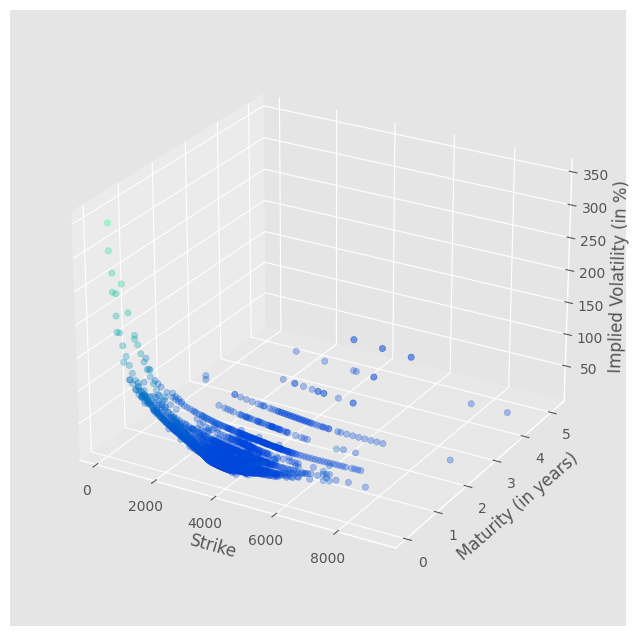

In [406]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'spx' is a pandas DataFrame with columns 'strike', 'maturity', and 'implied_volatility_1545'
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    spx['strike'],
    spx['maturity'],
    100*spx['implied_volatility_1545'],
    c=100*spx['implied_volatility_1545'],  # Use the column for color mapping
    vmin=-100,
    cmap='winter',  # Choose a colormap (you can use any available colormap)
    marker='o',
    alpha=0.3
)


# Set axis labels
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity (in years)')
ax.set_zlabel('Implied Volatility (in %)')

# Set plot title
# ax.set_title(r"Implied volatility surface for SPX options" + '\n' +r"November $4^{th}$ 2022", wrap=True)

# Set view
ax.view_init(elev=25, azim=-60)
ax.dist = 11

plt.savefig('implied_volatility_surface.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()


In [407]:
sorted(spx["maturity"].value_counts().iloc[:5].index.tolist())

[0.03833069809783911,
 0.11499209429351732,
 0.2108188395381151,
 0.3641416319294715,
 1.111590244837334]

In [408]:
NB_MARGINALS = 7

# Plotting utils
num_rows = (NB_MARGINALS + 2) // 3
num_cols = min(3, NB_MARGINALS)

target_expis = sorted(spx["maturity"].value_counts().iloc[:NB_MARGINALS].index.tolist())
# target_expis = [0.115, .21]
tolerance = 0.01

spx_marginals = spx[np.any([np.isclose(spx['maturity'], target, atol=tolerance) for target in target_expis], axis=0)]

In [409]:
spx_marginals = spx_marginals.query("option_type=='C'") # Keep calls only

In [410]:
def get_common_strikes(df: pd.DataFrame):
    expis = df.expiration.unique().tolist()
    common_strikes = set(df.query("expiration==@expis[0]").strike)
    for i in range(1, len(expis)):
        curr_expi = expis[i]
        common_strikes = common_strikes.intersection(set(df.query("expiration==@curr_expi").strike))
    print(f"Number of common strikes at all expirations: {len(common_strikes)}")
    return common_strikes
    


In [411]:
common_strikes = get_common_strikes(spx_marginals)

Number of common strikes at all expirations: 29


In [412]:
spx_marginals = spx_marginals[spx_marginals["strike"].isin(common_strikes)]

In [413]:
expis = spx_marginals.expiration.unique().tolist()

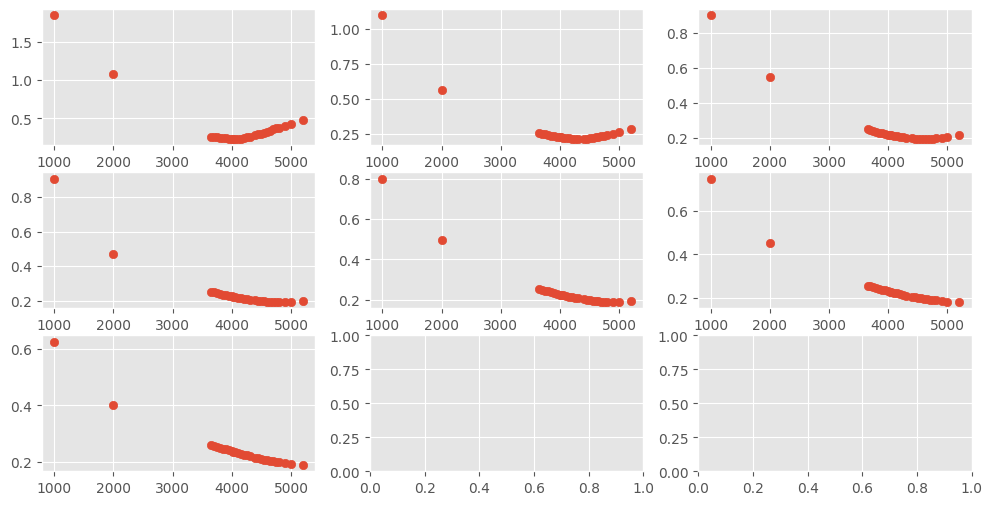

In [414]:
plt.style.use('ggplot')

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12,6))
axs = axs.flatten()

strikes, ivs, prices = dict(), dict(), dict()
for i in range(1, NB_MARGINALS+1):
    curr_expi = expis[i-1]
    strikes["expi{0}".format(i)], ivs["expi{0}".format(i)], prices["expi{0}".format(i)] = spx_marginals.query("expiration==@curr_expi")[["strike", "implied_volatility_1545", "mid"]].to_numpy().T
    
    axs[i-1].scatter(strikes["expi{0}".format(i)], ivs["expi{0}".format(i)])

plt.show()

In [415]:
def smile_to_density(strikes: np.ndarray | list[float], prices: np.ndarray | list[float]):
    """
    Breeden-Litzenberger formula: we derive (through finite differences) the options prices
    with regards to the strike twice in order to get the implied probability density of the asset at expiry.
    """
    partial_strike_first_order = np.divide(np.diff(prices), np.diff(strikes))
    partial_strike_second_order = np.divide(np.diff(partial_strike_first_order), np.diff(strikes[:-1]))
    return partial_strike_second_order

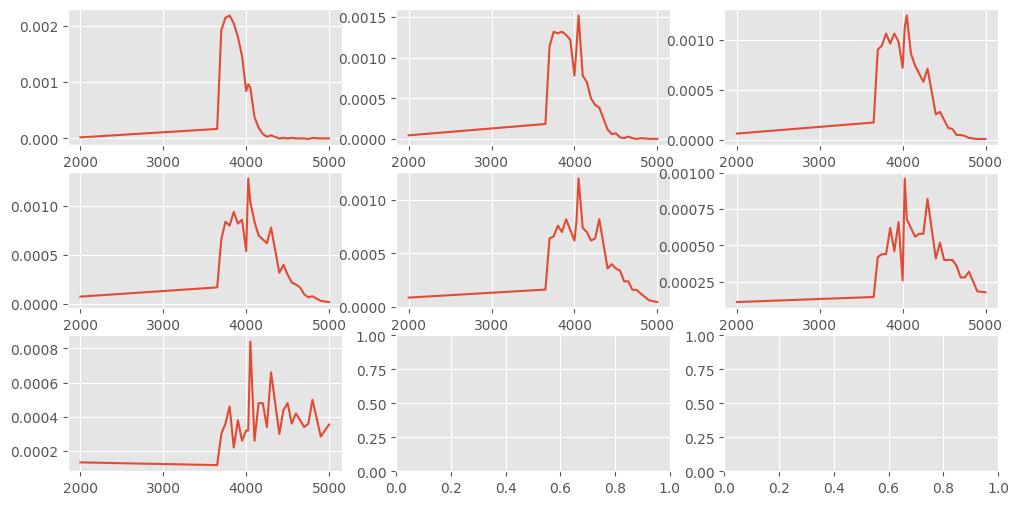

In [416]:
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12,6))
axs = axs.flatten()

for i in range(1, NB_MARGINALS+1):
    axs[i-1].plot(strikes["expi{0}".format(i)][1:-1], smile_to_density(strikes["expi{0}".format(i)], prices["expi{0}".format(i)]))

plt.show()



In [417]:
# Meh this is quite shaky as it is discretized from available prices.
# Maybe we should SSVI the smile to get smoother results, but this parametric model may impact the 
# model-freeness of the whole pipeline.

In [418]:
densities = {}
for key in strikes.keys():
    density = smile_to_density(strikes[key], prices[key])
    densities[key] = density

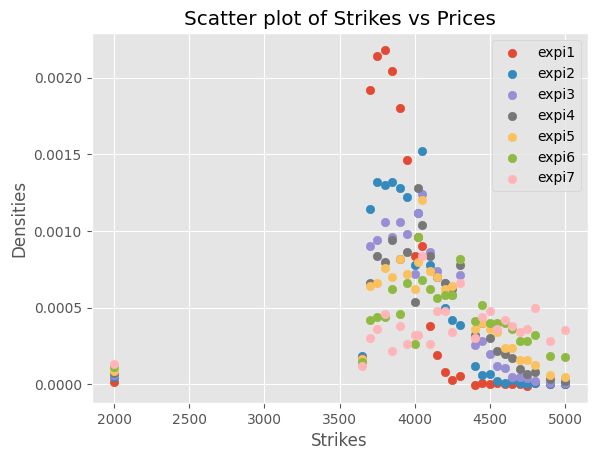

In [419]:
for key in strikes.keys():
    plt.scatter(strikes[key][1:-1], densities[key], label=key)
    # plt.fill_between(strikes[key][1:-1], densities[key], alpha=0.1)

# Add labels and legend
plt.xlabel('Strikes')
plt.ylabel('Densities')
plt.title('Scatter plot of Strikes vs Prices')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [167]:
density = pd.DataFrame({"strikes": strikes_1[1:-1],
                       "density_short": smile_to_density(strikes_1, price_1),
                       "density_long": smile_to_density(strikes_2, price_2),})

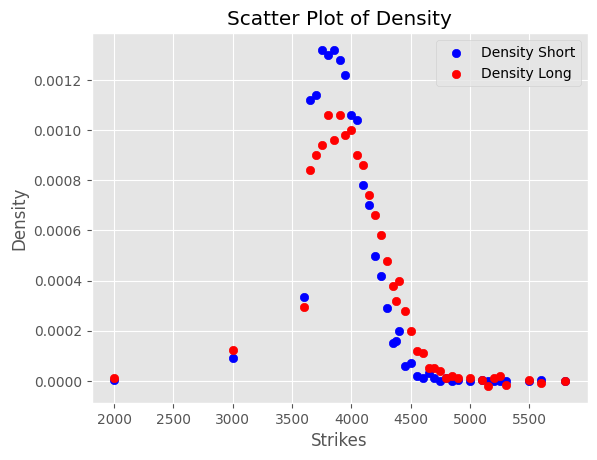

In [168]:
df=density
plt.scatter(df['strikes'], df['density_short'], label='Density Short', color='blue')
plt.scatter(df['strikes'], df['density_long'], label='Density Long', color='red')
plt.xlabel('Strikes')
plt.ylabel('Density')
plt.title('Scatter Plot of Density')
plt.legend()
plt.show()

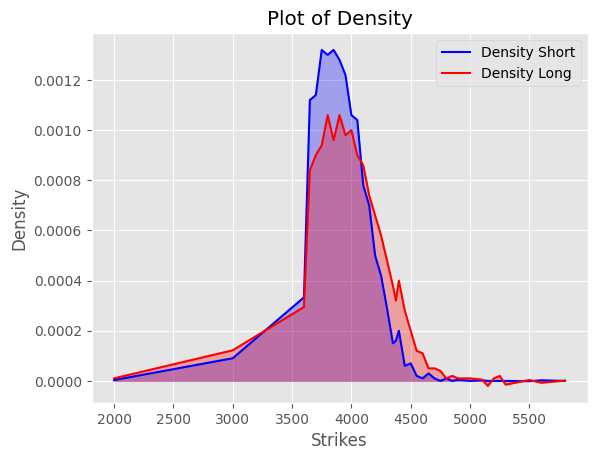

In [171]:
# Plot lines for density_short
plt.plot(df['strikes'], df['density_short'], label='Density Short', color='blue')

# Highlight the area below the curve for density_short
plt.fill_between(df['strikes'], df['density_short'], color='blue', alpha=0.3)

# Plot lines for density_long
plt.plot(df['strikes'], df['density_long'], label='Density Long', color='red')

# Highlight the area below the curve for density_long
plt.fill_between(df['strikes'], df['density_long'], color='red', alpha=0.3)

plt.xlabel('Strikes')
plt.ylabel('Density')
plt.title('Plot of Density')
plt.legend()
plt.show()

In [185]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [195]:
density.strikes.to_numpy()

array([2000., 3000., 3600., 3650., 3700., 3750., 3800., 3850., 3900.,
       3950., 4000., 4050., 4100., 4150., 4200., 4250., 4300., 4350.,
       4375., 4400., 4450., 4500., 4550., 4600., 4650., 4700., 4750.,
       4800., 4850., 4900., 5000., 5100., 5150., 5200., 5250., 5300.,
       5500., 5600., 5800.])

In [205]:
x = density.strikes.to_numpy()

s = density.density_short.to_numpy() 
s *= 1/s.sum()
l = density.density_long.to_numpy() 
l *= 1/l.sum()

# loss matrix
n = len(x)
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

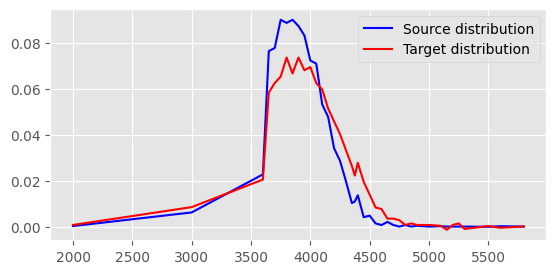

In [206]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, s, 'b', label='Source distribution')
pl.plot(x, l, 'r', label='Target distribution')
pl.legend()

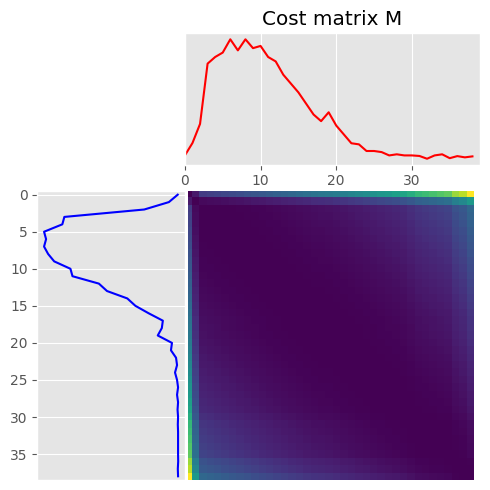

In [207]:
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(s, l, M, 'Cost matrix M')

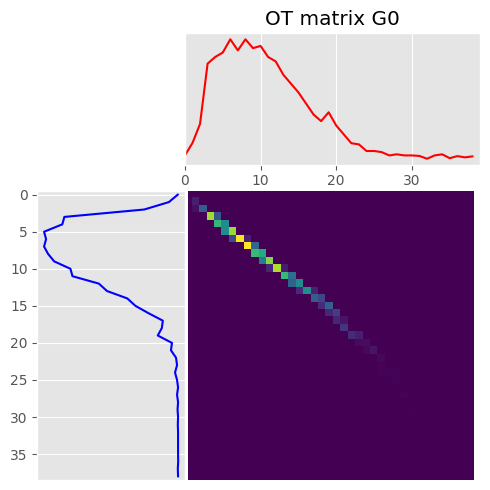

In [208]:
# use fast 1D solver
G0 = ot.emd_1d(x, x, s, l)

# Equivalent to
# G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(s, l, G0, 'OT matrix G0')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:491: RuntimeWarning: divide by zero encountered in divide
  Kp = (1 / a).reshape(-1, 1) * K
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:491: RuntimeWarning: invalid value encountered in multiply
  Kp = (1 / a).reshape(-1, 1) * K
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


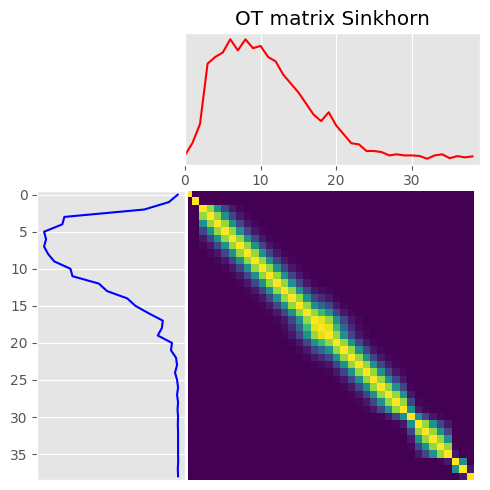

In [210]:
lambd = 1e-3
Gs = ot.sinkhorn(s, l, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(s, l, Gs, 'OT matrix Sinkhorn')

pl.show()

In [202]:
1/s.sum()

68.28025555023649

# Smoothing this bullshit

Calibrated parameters: [ 0.1056015  -0.00277894  0.08748577  0.10298884  0.09994138]


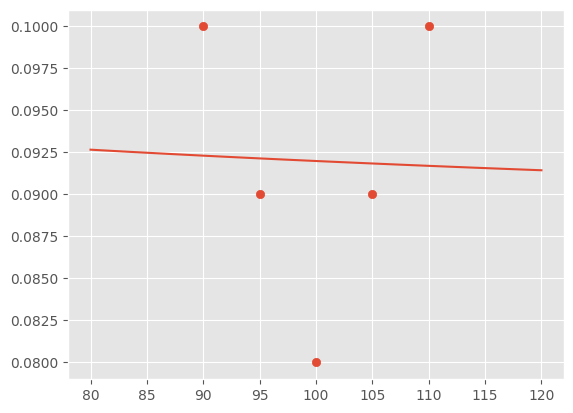

In [389]:
import numpy as np
from scipy.optimize import minimize

def svi_variance(params, strike):
    k = np.log(strike)
    a, b, rho, m, sigma = params
    return (a + b * (rho * (k - m) + np.sqrt((k - m)**2 + sigma**2)))



def svi_calibration(strikes, implied_variances):
    def objective_function(params, strikes, implied_variances):
        ks = np.log(strikes)
        a, b, rho, m, sigma = params
        return np.sum((implied_variances - (a + b * (rho * (ks - m) + np.sqrt((ks - m)**2 + sigma**2))))**2)

    
    initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1]  # Initial guess for the parameters

    result = minimize(objective_function, initial_guess, args=(strikes, implied_variances))

    return result.x

# Example usage:
strikes = np.array([90, 95, 100, 105, 110])
implied_variances = np.array([0.1, 0.09, 0.08, 0.09, 0.1])

calibrated_params = svi_calibration(strikes, implied_variances)
print("Calibrated parameters:", calibrated_params)


plt.scatter(strikes, implied_variances)
plt.plot(np.linspace(80,120,100), [svi_variance(calibrated_params, strike) for strike in np.linspace(80,120,100)])

Calibrated parameters: [-0.36745137  0.97269723 -0.58724057 -0.33728525  0.47498012]


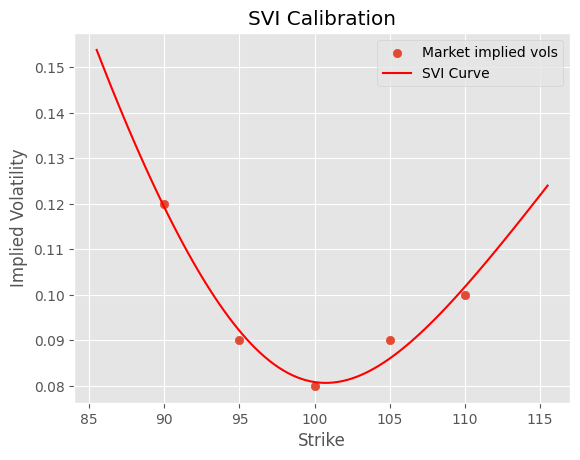

In [399]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def svi_variance(params, log_moneyness):
    a, b, rho, m, sigma = params
    return a + b * (rho * (log_moneyness - m) + np.sqrt((log_moneyness - m)**2 + sigma**2))

def svi_calibration(log_moneyness, implied_vols):
    def objective_function(params, log_moneyness, implied_vols):
        implied_variances = implied_vols**2
        a, b, rho, m, sigma = params
        return np.sum((implied_variances - svi_variance(params, log_moneyness))**2)

    initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1]  # Initial guess for the parameters

    result = minimize(objective_function, initial_guess, args=(log_moneyness, implied_vols))

    return result.x

# Example usage:
strike_prices = np.array([90, 95, 100, 105, 110])
S0 = 100  # Initial stock price
log_moneyness = np.log(strike_prices / S0)
implied_vols = np.array([0.12, 0.09, 0.08, 0.09, 0.1])

calibrated_params = svi_calibration(log_moneyness, implied_vols)
print("Calibrated parameters:", calibrated_params)

# Plotting
universe = np.linspace(0.95*min(strike_prices), 1.05*max(strike_prices), 100)
plt.scatter(strike_prices, implied_vols, label='Market implied vols')
plt.plot(universe, np.sqrt([svi_variance(calibrated_params, np.log(strike/S0)) for strike in universe]), label='SVI Curve', color='red')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend()
plt.title('SVI Calibration')
plt.show()


In [432]:
K_test, ivs_test = strikes['expi1'][2:], ivs['expi1'][2:]

In [433]:
S0=3770

In [434]:
log_moneyness = np.log(np.array(K_test) / S0)
implied_vols = np.array(ivs_test)

In [435]:
log_moneyness

array([-0.03234783, -0.01874218, -0.00531916,  0.00792607,  0.02099815,
        0.03390155,  0.04664058,  0.05921936,  0.06544991,  0.07164188,
        0.08391197,  0.09603333,  0.10800952,  0.11984398,  0.13154002,
        0.15452954,  0.16582909,  0.1770024 ,  0.18805223,  0.1989813 ,
        0.20979222,  0.22048751,  0.23106962,  0.24154092,  0.2621602 ,
        0.28236291,  0.32158362])

Calibrated parameters: [-0.12284099  1.06064217  0.3807515   0.13559096  0.18028743]


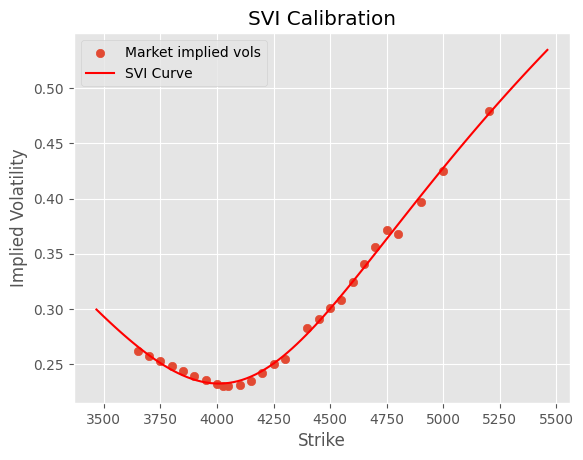

In [436]:
calibrated_params = svi_calibration(log_moneyness, implied_vols)
print("Calibrated parameters:", calibrated_params)

# Plotting
universe = np.linspace(0.95*min(K_test), 1.05*max(K_test), 100)
plt.scatter(K_test, implied_vols, label='Market implied vols')
plt.plot(universe, np.sqrt([svi_variance(calibrated_params, np.log(strike/S0)) for strike in universe]), label='SVI Curve', color='red')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend()
plt.title('SVI Calibration')
plt.show()
